## Imports

In [20]:
import pandas as pd
import re
import numpy as np
import nltk
import sklearn
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import pickle


nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Setup
[nltk_data]     Game\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Setup
[nltk_data]     Game\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df = pd.read_csv("data.csv")
df.head()

,text,rating
0,Thanks to the kindness of the young couple tha...,5.0
1,I have a small tourist company and bring peopl...,5.0
2,Very nice and quiet room on the Tangier beachf...,5.0
3,Very clean clean hotel I felt so safe and comf...,5.0
4,"The hotel, staff and all the amenities were on...",5.0


## Data Processing

4032 3841 16949


<BarContainer object of 3 artists>

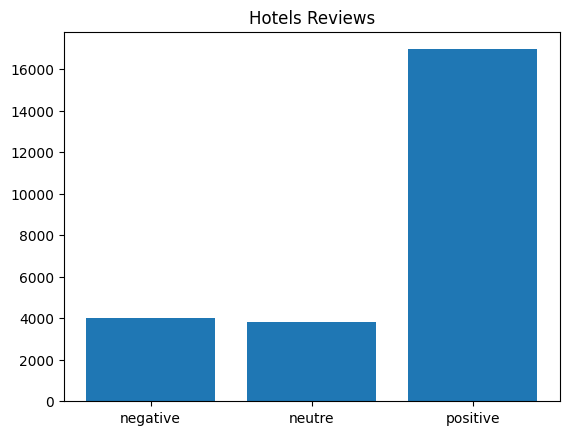

In [22]:
x=["negative","neutre","positive"]
neg=df.where(df['rating']<=2).value_counts("rating").sum()
pos=df.where(df['rating']>3).value_counts("rating").sum()
nat=df.where(df['rating']==3).value_counts("rating").sum()
print(neg,nat,pos)
y=[neg,nat,pos]

plt.title("Hotels Reviews")
plt.bar(x,y)

In [23]:
df = df.drop_duplicates()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24819 entries, 0 to 24821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    24819 non-null  object 
 1   rating  24819 non-null  float64
dtypes: float64(1), object(1)
memory usage: 581.7+ KB


In [25]:
rating = {4:1,5:1,1:-1,2:-1,3:0}
df.rating = [rating[item] for item in df.rating]

In [26]:
pos = df[df["rating"] ==1][0:4000]
nat = df[df['rating']==0]
neg = df[df['rating']==-1]
df = pos.append([nat,neg], ignore_index=True)
df.to_csv("filtred_data.csv",index=False)

C:\Users\Setup Game\AppData\Local\Temp\ipykernel_12088\3910158076.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = pos.append([nat,neg], ignore_index=True)


In [27]:
df = df[df.rating != 0]

In [28]:
df.head()

,text,rating
0,Thanks to the kindness of the young couple tha...,1
1,I have a small tourist company and bring peopl...,1
2,Very nice and quiet room on the Tangier beachf...,1
3,Very clean clean hotel I felt so safe and comf...,1
4,"The hotel, staff and all the amenities were on...",1


In [29]:
def clean_text(df):
  all_reviews = list()
  lines = df['text'].values.tolist()
  for text in lines:
    text = text.lower()
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    tokens = word_tokenize(text)
    #??
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    stop_words.discard("not")
    PS = PorterStemmer()
    words = [PS.stem(w) for w in words if not w in stop_words]
    words = ' '.join(words)
    all_reviews.append(words)
  return all_reviews

all_reviews = clean_text(df)
all_reviews[0:20]


['thank kind young coupl manag hotel hospit realli warm hotel clean comfort littl bit noisi accur privat park backyard worth price',
 'small tourist compani bring peopl morocco via marina smir nearbi stay mani mani time keep come back coupl own hotel live sweden speak fluent swedish appreci lot sinc well great hotel new fresh build right center town min sea run bakeri shop build make stay even pleasant tasti not get better valu money anywher tell star happi abl keep low price sinc winter season long northern morocco internet climat control cabletv roomservic great clean',
 'nice quiet room tangier beachfront room sea view great view day night friendli staff make hilton member feel welcom breakfast buffet great larg varieti product includ moroccan corner',
 'clean clean hotel felt safe comfort locat perfect near beach hilton honor gold member got special attent open arriv recept team got free upgrad sea view room bed comfort room clean breakfast welcom fatima zahra got special treat mrm

In [30]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
CV = CountVectorizer(min_df=2)
X = CV.fit_transform(all_reviews).toarray()
print(np.where(X[0]==1))
y= df["rating"].values

print(np.shape(X))
print(np.shape(y))

(array([  55,  487,  670, 1174, 1259, 1445, 3045, 3475, 3664, 3808, 4313,
       4611, 4943, 4969, 5185, 6502, 7096, 7269, 7316], dtype=int64),)
(8032, 7389)
(8032,)


## Training

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Naive Bayes 

In [33]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

### SVM


In [34]:
from sklearn import svm

model_svm = svm.SVC(C=7.0, kernel='linear')
model_svm.fit(X_train, y_train)

SVC(C=7.0, kernel='linear')

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

LogisticRegression()

### Decision tree


In [36]:
from sklearn.tree import DecisionTreeClassifier

model_dec = DecisionTreeClassifier(max_depth=10, random_state=0)
model_dec.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

## Evaluation


In [37]:
#Mean Accuracy
print(model_svm.score(X_test, y_test))
print(model_dec.score(X_test, y_test))
print(model_gnb.score(X_test, y_test))
print(model_lg.score(X_test, y_test))

0.9433727442439328
0.8294959551960174
0.7660236465463597
0.9502177971375233


## Testing

In [38]:
x_dataframe = pd.DataFrame([
    "it was good experience",
    "it was bad and dirty rooms"], 
    columns=['text'])
text = clean_text(x_dataframe)
x = CV.transform(text).toarray()

In [39]:
# best result should be [1,-1]
print("Naive Bayes",model_gnb.predict(x))
print("SVM",model_svm.predict(x))
print("Decision Tree",model_dec.predict(x))
print("Logistic Regression",model_lg.predict(x))

Naive Bayes [1 1]
SVM [ 1 -1]
Decision Tree [ 1 -1]
Logistic Regression [ 1 -1]
